# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series models
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#for data preparation and visualization
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [4]:
stock_ticker = ["AMZN", "AAPL", "MSFT", "F"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  4 of 4 completed


In [5]:
stock_data["Adj Close"]["AMZN"]

Date
1972-06-01           NaN
1972-06-02           NaN
1972-06-05           NaN
1972-06-06           NaN
1972-06-07           NaN
                 ...    
2023-10-17    131.470001
2023-10-18    128.130005
2023-10-19    128.399994
2023-10-20    125.169998
2023-10-23    126.559998
Name: AMZN, Length: 12960, dtype: float64

In [6]:
return_period = 5

Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "AMZN")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("AAPL", "MSFT", "F")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["AMZN_DT", "AMZN_3DT", "AMZN_6DT", "AMZN_12DT"]



X=\
(
    pd
    .concat([X1, X2, X3, X4],
            axis = 1)
)

X["21day"] = stock_data["Adj Close"]["AMZN"].rolling(window=21).mean()
X["63day"] = stock_data["Adj Close"]["AMZN"].rolling(window=63).mean()
X["252day"] = stock_data["Adj Close"]["AMZN"].rolling(window=252).mean()



X["10day"] = stock_data["Adj Close"]["AMZN"].ewm(span=10, min_periods=10).mean()
X["30day"] = stock_data["Adj Close"]["AMZN"].ewm(span=30, min_periods=30).mean()
X["200day"] = stock_data["Adj Close"]["AMZN"].ewm(span=200, min_periods=200).mean()


data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

Y = data.loc[ : , Y.name]
X = data.loc[ : , X.columns]

In [7]:
data.head()

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,21day,63day,252day,10day,30day,200day
2018-11-01,0.052274,0.010950,-0.022221,0.032826,0.002219,0.011395,0.012780,0.015733,-0.225003,-0.067688,-0.031809,-0.154759,-0.124590,87.439142,93.812809,78.607805,83.248415,88.594843,82.956557
2018-11-08,-0.080337,-0.060294,0.053580,0.018134,0.009530,0.010886,0.023963,0.031434,-0.145570,0.052274,-0.008969,-0.137199,-0.070247,85.433143,93.070722,79.176061,84.421742,87.482804,83.031643
2018-11-16,-0.007610,-0.054989,-0.007440,-0.035815,-0.008917,-0.010768,-0.016218,-0.022415,0.043951,-0.072037,-0.030532,-0.170515,-0.177503,83.292619,91.839285,79.772855,82.085186,85.482932,82.946778
2018-11-27,0.053542,-0.064560,0.023802,0.003238,0.010420,-0.006265,0.015132,0.011504,-0.167135,0.044698,-0.028906,-0.107530,-0.241159,80.383286,90.039428,80.220399,78.588869,82.601136,82.577285
2018-12-06,-0.024310,-0.034981,-0.017521,-0.042328,-0.008500,-0.000939,-0.015389,-0.015558,0.120205,0.012698,0.040854,-0.040093,-0.156550,81.705357,88.591500,80.857690,83.043931,83.355855,82.709784


In [8]:
Y

2018-11-01    0.052274
2018-11-08   -0.080337
2018-11-16   -0.007610
2018-11-27    0.053542
2018-12-06   -0.024310
                ...   
2023-09-14   -0.112434
2023-09-21   -0.026244
2023-09-28   -0.000159
2023-10-05    0.049334
2023-10-13   -0.036245
Name: AMZN_pred, Length: 235, dtype: float64

In [9]:
#testing set
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [10]:
num_folds = 10
seed = 231023
scoring = "neg_mean_squared_error"

models = []

models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

# Alternatives
## light GMB
## CAT Boost

In [11]:
### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.003044 (0.000994) 0.002227 0.003972
LASSO: 0.002549 (0.001030) 0.002498 0.003545
EN: 0.002549 (0.001030) 0.002498 0.003545
CART: 0.006938 (0.002947) 0.000000 0.008402
KNN: 0.002963 (0.001110) 0.001879 0.004505
SVR: 0.002623 (0.001066) 0.002430 0.003755
RFR: 0.003133 (0.001508) 0.000442 0.004107
ETR: 0.003179 (0.001358) 0.000000 0.004534
GBR: 0.003723 (0.001544) 0.000134 0.004433
ABR: 0.003284 (0.001671) 0.001064 0.003831


In [12]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , ["AAPL", "MSFT", "F", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , ["AAPL", "MSFT", "F", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

### <font color = red> Answer 1 is presented in the cell below: </font>

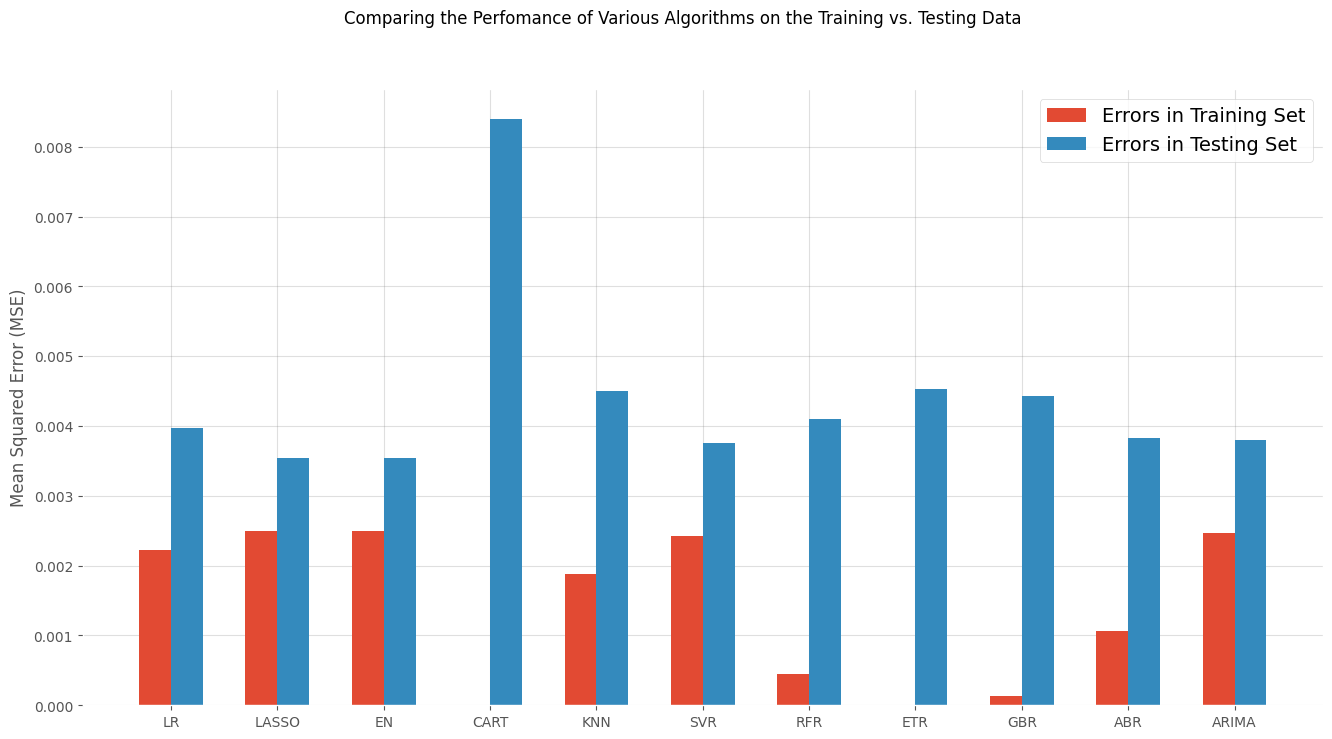

In [13]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

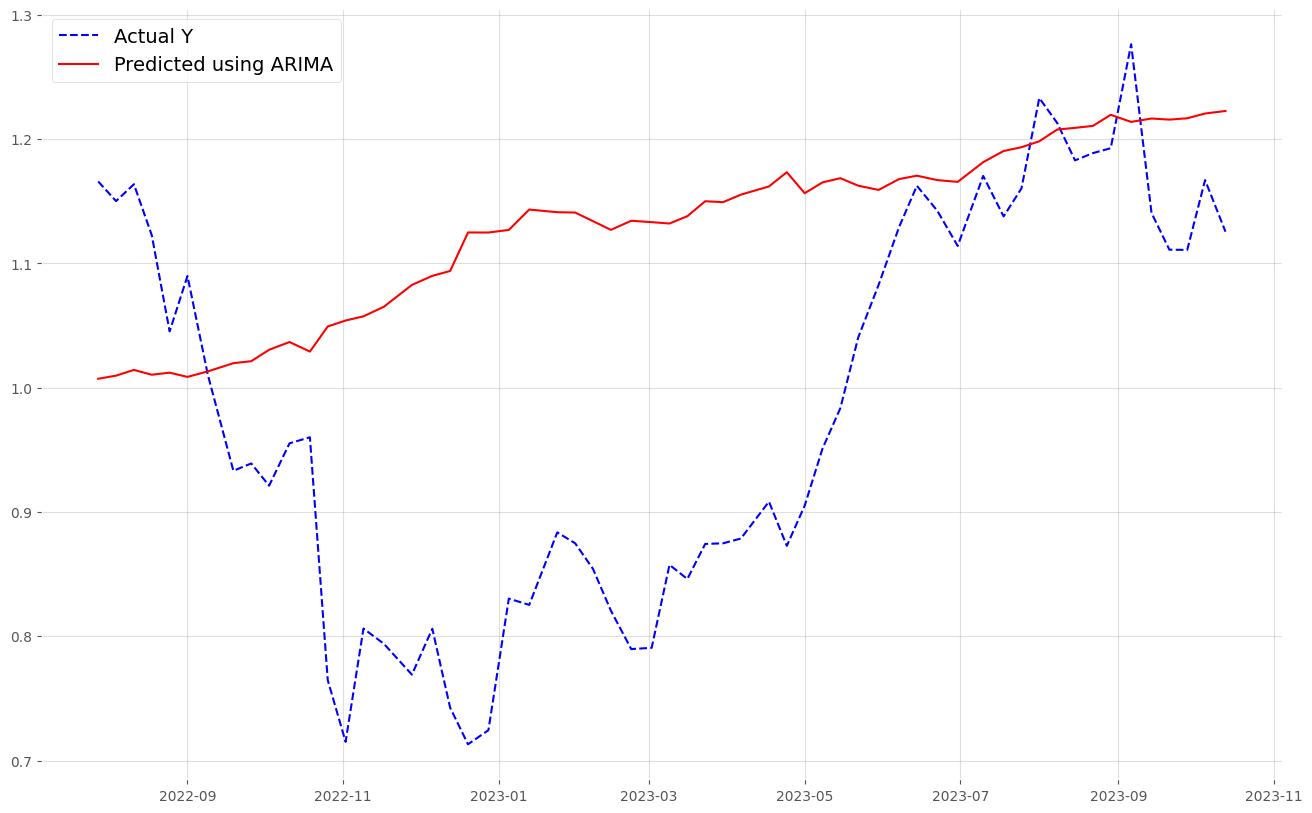

In [14]:
plt.figure(figsize = (16, 10)
           )

predicted.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(predicted).cumprod(), "r", label = "Predicted using ARIMA")

plt.legend()
plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [15]:
# Download historical data for AAPL
stock_data = yf.download("AAPL", start="2015-01-01", end="2017-12-31")

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = stock_data['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Initialize capital and commission fee
capital = 100000
commission_fee = 5

# Initialize positions and signals
long_position = 0
short_position = 0
in_position = None
positions = []

# Apply trading strategy
rsi_threshold_low = 30
rsi_threshold_high = 70
rsi_mid_level = 50

stock_data["rsi"] = calculate_rsi(stock_data, period=14)   
signals = []

for i in range(len(stock_data)):
    rsi = stock_data["rsi"][i]
    if rsi < rsi_threshold_low and in_position is None:
        #long
        in_position = 'long'
        signals.append(1)
    elif rsi > rsi_threshold_high and in_position is None:
        #short
        in_position = 'short'
        signals.append(-1)
    elif rsi > rsi_mid_level and in_position == 'long':
        #exit long
        in_position = None
        signals.append(0)
    elif rsi < rsi_mid_level and in_position == 'short':
        #exit short
        in_position = None
        signals.append(0)
    else:
        signals.append(np.nan)

stock_data["mSignal"] = signals

stock_data["Signal"] = stock_data["mSignal"].ffill()

# Calculate Log returns
stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

# Derives the log returns of the strategy given the positionings and market returns.
stock_data["strategy_returns"] =(stock_data["Signal"].shift(1) * stock_data["log_returns"] )

#Cumulative returns
stock_data["cumulative_returns"] = stock_data["log_returns"].cumsum().apply(np.exp)
        
#Cumulative strategy returns
stock_data["cumulative_strategy_returns"] = stock_data["strategy_returns"].cumsum().apply(np.exp)

#Max_gross_performance
stock_data["max_gross_performance"] = stock_data["cumulative_returns"].cummax()

    
    








[*********************100%%**********************]  1 of 1 completed


In [16]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,rsi,mSignal,Signal,log_returns,strategy_returns,cumulative_returns,cumulative_strategy_returns,max_gross_performance
Date,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498678,212818400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808519,257142000,NaN,NaN,NaN,-0.028576,NaN,0.971829,NaN,0.971829
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810757,263188400,NaN,NaN,NaN,0.000094,NaN,0.971920,NaN,0.971920
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638,160423600,NaN,NaN,NaN,0.013925,NaN,0.985549,NaN,0.985549
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000,NaN,NaN,NaN,0.037702,NaN,1.023415,NaN,1.023415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427490,65397600,70.084688,-1.0,-1.0,0.000000,0.000000,1.691009,0.630738,1.704633
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376472,132742000,52.695577,NaN,-1.0,-0.025697,0.025697,1.648108,0.647156,1.704633
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383583,85992800,54.774930,NaN,-1.0,0.000176,-0.000176,1.648398,0.647042,1.704633


### <font color = red> Answer 2 is presented in the cell below: </font>

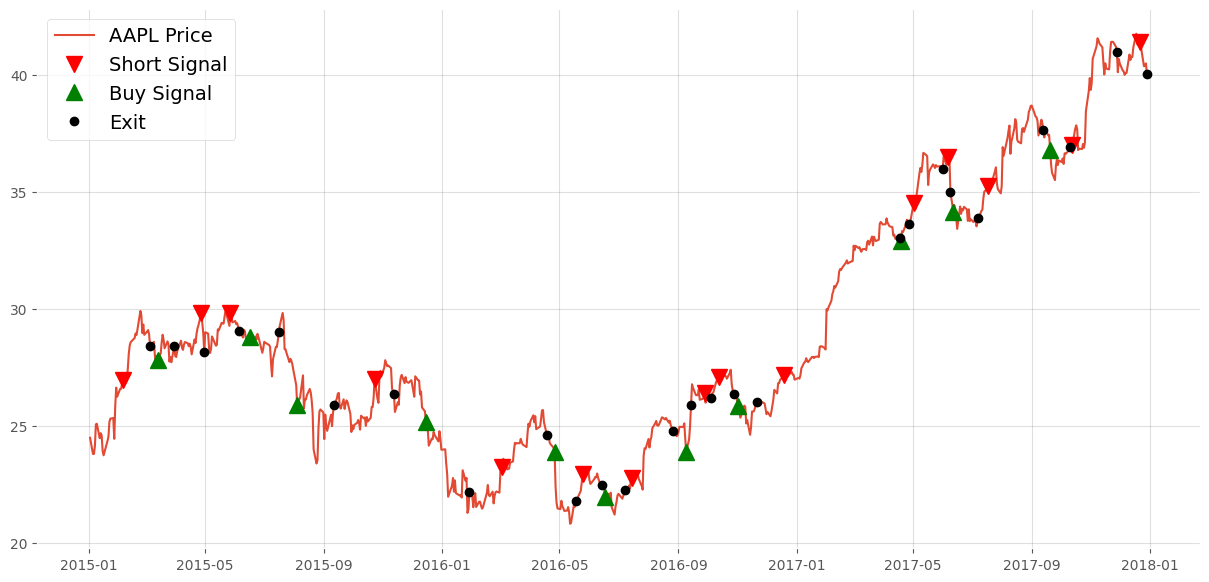

In [17]:
# Visualize buy and sell positions
plt.figure(figsize=(15, 7))
plt.plot(stock_data["Adj Close"], label="AAPL Price")

plt.plot(stock_data.loc[stock_data.mSignal == -1].index,stock_data.loc[stock_data.mSignal == -1]["Adj Close"]
             ,"v",
            color="red",
            markersize=12,
            label="Short Signal")

plt.plot(stock_data.loc[stock_data.mSignal == 1].index,stock_data.loc[stock_data.mSignal == 1]["Adj Close"]
             ,"^",
            color="green",
            markersize=12,
            label="Buy Signal")

plt.plot(stock_data.loc[stock_data.mSignal == 0].index,stock_data.loc[stock_data.mSignal == 0]["Adj Close"]
             ,".",
            color="black",
            markersize=12,
            label="Exit")

plt.legend()
plt.show()

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

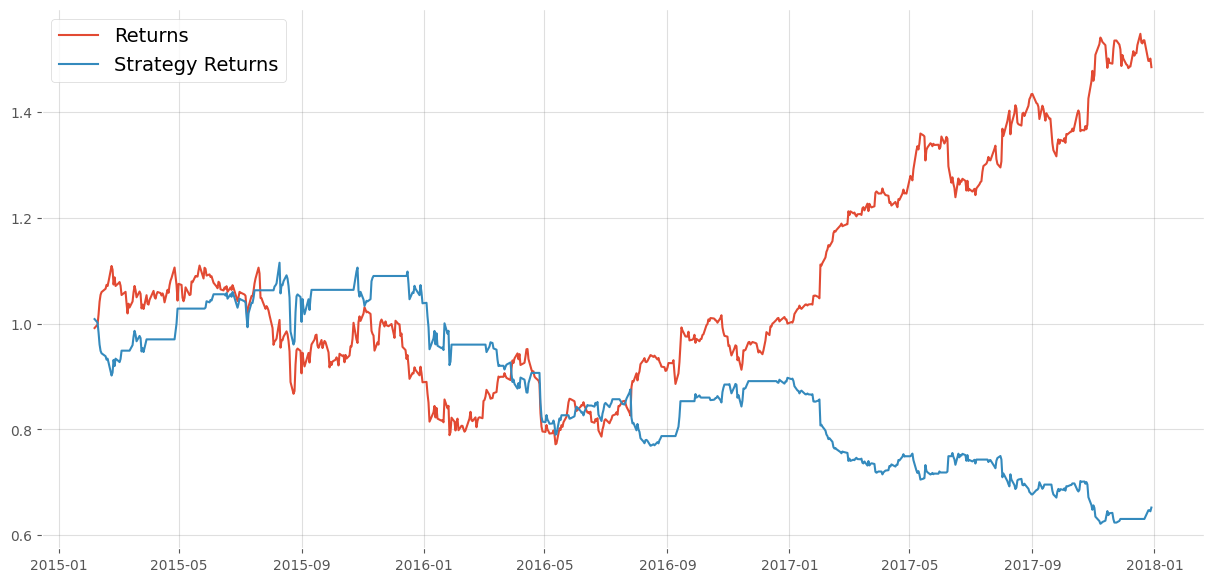

In [18]:
cumulative_returns = stock_data[["log_returns", "strategy_returns"]].dropna().cumsum().apply(np.exp)
plt.figure(figsize=(15, 7))
plt.plot(cumulative_returns)
plt.legend(["Returns","Strategy Returns"])

In [19]:
cumulative_returns

,log_returns,strategy_returns
Date,,
2015-02-06,0.991579,1.008492
2015-02-09,0.998166,1.001838
2015-02-10,1.017342,0.982954
2015-02-11,1.041187,0.960442
2015-02-12,1.054361,0.948442
...,...,...
2017-12-22,1.535361,0.630738
2017-12-26,1.496409,0.647156
2017-12-27,1.496673,0.647042


### <font color = red> Answer 3 </font>

    The answer is _____0.65_______ % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [20]:
stock_data = dict(stock_data)
stock_data

{'Open': Date
 2015-01-02    27.847500
 2015-01-05    27.072500
 2015-01-06    26.635000
 2015-01-07    26.799999
 2015-01-08    27.307501
                 ...    
 2017-12-22    43.669998
 2017-12-26    42.700001
 2017-12-27    42.525002
 2017-12-28    42.750000
 2017-12-29    42.630001
 Name: Open, Length: 755, dtype: float64,
 'High': Date
 2015-01-02    27.860001
 2015-01-05    27.162500
 2015-01-06    26.857500
 2015-01-07    27.049999
 2015-01-08    28.037500
                 ...    
 2017-12-22    43.855000
 2017-12-26    42.867500
 2017-12-27    42.695000
 2017-12-28    42.962502
 2017-12-29    42.647499
 Name: High, Length: 755, dtype: float64,
 'Low': Date
 2015-01-02    26.837500
 2015-01-05    26.352501
 2015-01-06    26.157499
 2015-01-07    26.674999
 2015-01-08    27.174999
                 ...    
 2017-12-22    43.625000
 2017-12-26    42.419998
 2017-12-27    42.427502
 2017-12-28    42.619999
 2017-12-29    42.305000
 Name: Low, Length: 755, dtype: float64,
 'Close':

In [21]:
def calculate_drawdown_periods(stock_data,return_column):
    drawdowns_data = {}  # Dictionary to store drawdown data for each stock

    for symbol, data in stock_data.items():
        # Extract date and return data
        dates = data.index
        returns = data[return_column]

        # Create a DataFrame with date and return columns
        df = pd.DataFrame({'Date': dates, 'returns': returns})

        # Calculate maximum returns and drawdown
        df["MAX_returns"] = df["returns"].cummax()
        drawdown = (df["returns"] / df["MAX_returns"]) - 1
        df["drawdown"] = drawdown

        drawdowns = []
        drawdown_periods = []
        start_date = None
        dd = 0

        for date, i in zip(df['Date'], df["drawdown"]):
            if i < 0:
                if start_date is None:
                    start_date = date
                    # Check for Monday
                    if start_date.weekday() == 0:
                        start_date = start_date - datetime.timedelta(days=3)
                    else:
                        start_date = start_date - datetime.timedelta(days=1)
                if i < dd:
                    dd = i
            elif i == 0:
                if start_date is not None:
                    end_date = date
                    drawdown_periods.append((end_date - start_date).days)
                    drawdowns.append(dd)
                    start_date = None
                    dd = 0

        if start_date is not None:
            end_date = df['Date'].iloc[-1]  # Use the last date in the data
            drawdown_periods.append((end_date - start_date).days)
            drawdowns.append(dd)

        # Store drawdown periods and values for the stock
        # drawdowns_data[symbol] = {"periods": drawdown_periods, "values": drawdowns}
        drawdowns_data[symbol] = dict(zip(drawdown_periods, drawdowns))

    return drawdowns_data


In [22]:
calculate_drawdown_periods(stock_data,'cumulative_returns')

KeyError: 'cumulative_returns'

In [ ]:
stock_data["cumulative_returns"]

### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 5 </font>

    Below average year(s) : ____________ 
    
    Above average year(s) : ____________ 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: __________
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 is presented in the cell below: </font>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊